In [0]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import sklearn.discriminant_analysis
import pandas as pd


The first step is to charging the data. In this case  Our dataset is a set of colombian celibrities images. If the name is an odd name the image is targeted as female, while if the name is pair the image is targeted as male.

In [2]:
#Charging data
number_files=100
y = np.ones(number_files)
images=[]
for i in range(number_files): 
  images.append(plt.imread("train/{}.jpg".format(i+1)).flatten()) 
  y[i] = i%2 
print(np.shape(images), np.shape(y))



(100, 30000) (100,)


After charging the data we will train the PCA using the sklearn library

In [3]:
#Training 
clf = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
clf.fit(images, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

The next step is to use another dataset and predict if the image corresponds to a male or a female

In [0]:
#Predicting
files_test = glob.glob("test/*.jpg")
n_test = len(files_test)
test_images = []
for file_test in files_test:
    test_images.append(plt.imread(file_test).flatten())
test_data = np.array(test_images)
predict_test = clf.predict(test_data)

We will use a registry to store our prediction

In [0]:
#Writing file with the prediction for every person
out = open("test/predict_test.csv", "w")
out.write("Name,Target\n")
for f, p in zip(files_test, predict_test):
    out.write("{},{}\n".format(f.split("/")[-1],p))
out.close()

Finally we calculate the F1 score to male and females

In [6]:
#Calculating F1 for both sex
truth = pd.read_csv("test/truth_test.csv")
predict = pd.read_csv("test/predict_test.csv")

truth  = truth.sort_values('Name')
predict = predict.sort_values('Name')

f1_0 = sklearn.metrics.f1_score(truth['Target'], predict['Target'], pos_label=0)
f1_1 = sklearn.metrics.f1_score(truth['Target'], predict['Target'], pos_label=1)
print('The F1 score of male and female are: {:.2f} , {:.2f}'.format(f1_0, f1_1))


The F1 score of male and female are: 0.83 , 0.75


0 255


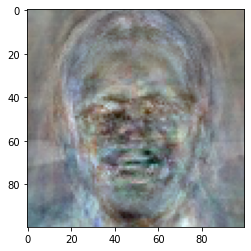

In [7]:
#Visualizing our discriminat vector
plt.figure()
discr = clf.coef_[0].reshape(100,100,3)
discr = discr-discr.min()
discr = np.int_(255*(discr/(discr.max() - discr.min())))
print(discr.min(), discr.max())
plt.imshow(discr)
plt.savefig("discriminant.png")